# Portfolio Selection Strategies
## Author: Snigdhayan Mahanta
Suppose there are 500 projects to choose from and the available resources would allow only 10 of them to be funded. How could one select the projects to be funded? I created a simplified model to address this problem, e.g., I ignored the project duration and the associate time value of money. Each project consists of the following attributes:

1. `Value` - this is some abstract estimate of the value that can be generated by executing the project (cash inflow)
2. `Risk` - this is the probability of failure of the project (should be greater than `inherent risk`)
3. `Effort` - this is some abstract estimate of the project expenses (cash outflow)

I also created a `risk tolerance` parameter - only projects, whose associated `risk` fall below the value of this parameter, are considered for portfolio selection. Based on this information I can think of two simple strategies:

1. Risk-adjusted strategy - rank the projects according to `expected value` (taking into account the risk probabilities).
2. Value-driven strategy - rank the projects according to `normalized value` (value divided by effort) ignoring risk.

The first approach is an additive model and the second approach is a multiplicative model. After creating a random portfolio of projects I applied the two selection strategies and compared the outcomes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Default parameters
default_value = 10000 
default_risk = 0.5 
default_effort = 100
inherent_risk = 20 # minimum risk involved in any project
risk_tolerance = 80 # should be greater than inherent_risk

In [3]:
# Definition of project
class project:
    '''
    project has attributes 'value', 'risk' and 'effort'
    
    '''
    
    value = default_value
    risk = default_risk # probability of failure
    effort = default_effort
    
    def __init__(self):
        self.value = np.random.choice(a=range(1000, 10000))
        self.risk = np.random.choice(a=range(inherent_risk, risk_tolerance))/100
        self.effort = np.random.choice(a=range(100, 1000))

    def execute(self):
        return np.random.choice(a=[0,1], p=[self.risk, 1-self.risk]) # 0 = failure, 1 = success  
    
    def expected_value(self):
        return (self.value-self.effort)*(1-self.risk) - self.effort*self.risk
    
    def normalized_value(self):
        return self.value/self.effort
    
    def earned_value(self):
        return self.execute()*self.value - self.effort

In [4]:
# Portfolio creation function
def create_portfolio(n_projects):
    '''
    create a portfolio of projects

    '''
    
    expected_values_dict = {}
    normalized_values_dict = {}
    earned_values_dict = {}
    
    for i in range(1, n_projects+1):
        proj = project()
        key_1 = i 
        key_2 = i
        key_3 = i
        expected_values_dict[key_1] = proj.expected_value()
        normalized_values_dict[key_2] = proj.normalized_value()
        earned_values_dict[key_3] = proj.earned_value()
        
    return expected_values_dict, normalized_values_dict, earned_values_dict

In [5]:
# Simulation parameters
n_projects = 500
n_selected = 10
exp_vals, norm_vals, earn_vals = create_portfolio(n_projects)

In [6]:
# Strategy 1 - select projects based on expected value
exp_vals = dict(sorted(exp_vals.items(), key=lambda item: item[1], reverse=True))
exp_vals = list(exp_vals.items())
exp_vals = exp_vals[0:n_selected]
selected_projects_1 = [element[0] for element in exp_vals]

In [7]:
# Strategy 2 - select projects based on normalized value
norm_vals = dict(sorted(norm_vals.items(), key=lambda item: item[1], reverse=True))
norm_vals = list(norm_vals.items())
norm_vals = norm_vals[0:n_selected]
selected_projects_2 = [element[0] for element in norm_vals]

In [8]:
# Comparison of the two selection strategies
data = {'Strategy 1 - Expected Values': exp_vals, 'Strategy 2 - Normalized Values': norm_vals}
project_selection = pd.DataFrame(data=data)
project_selection

,Strategy 1 - Expected Values,Strategy 2 - Normalized Values
0,"(286, 7301.2)","(206, 81.79207920792079)"
1,"(243, 7258.000000000001)","(154, 80.4090909090909)"
2,"(184, 7057.0)","(53, 78.40776699029126)"
3,"(277, 6703.16)","(326, 67.03623188405797)"
4,"(178, 6633.83)","(181, 66.11643835616438)"
5,"(321, 6624.32)","(310, 65.85123966942149)"
6,"(179, 6612.6)","(139, 64.75396825396825)"
7,"(252, 6374.820000000001)","(140, 60.091603053435115)"
8,"(489, 6295.41)","(21, 54.526315789473685)"
9,"(318, 6219.04)","(97, 51.375757575757575)"


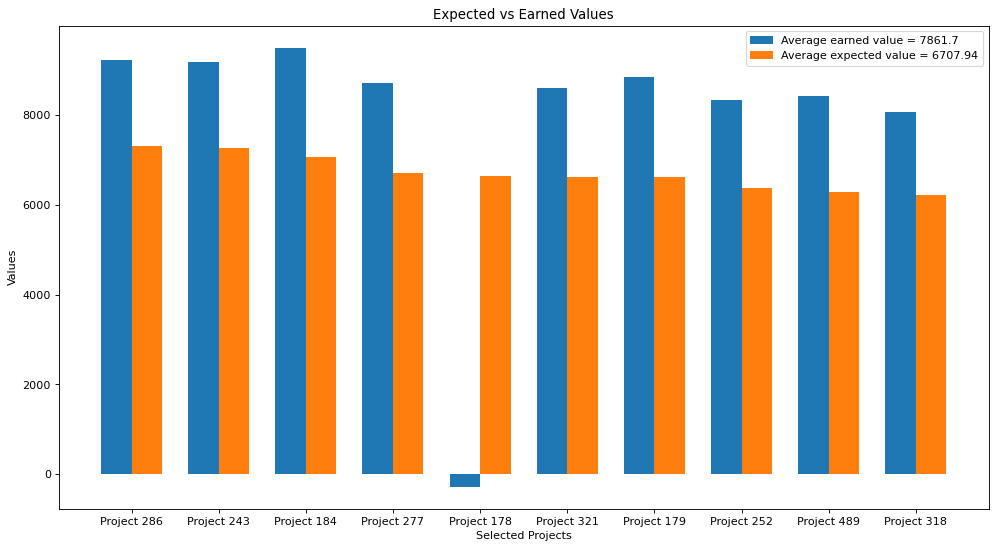

In [9]:
# Visualize the expected vs the earned values
labels = ["Project "+str(p) for p in selected_projects_1]
x = np.arange(len(labels))  # the label locations

y1 = [earn_vals[n] for n in selected_projects_1]
avg_earn_val = round(sum(y1)/len(y1),2)

y2 = [element[1] for element in exp_vals]
avg_exp_val = round(sum(y2)/len(y2),2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label='Earned')
rects2 = ax.bar(x + width/2, y2, width, label='Expected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Selected Projects')
ax.set_ylabel('Values')
ax.set_title('Expected vs Earned Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Average earned value = {avg_earn_val}', 
           F'Average expected value = {avg_exp_val}']
ax.legend(legends, loc='upper right')

#ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

#fig.tight_layout()
#figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

plt.show()

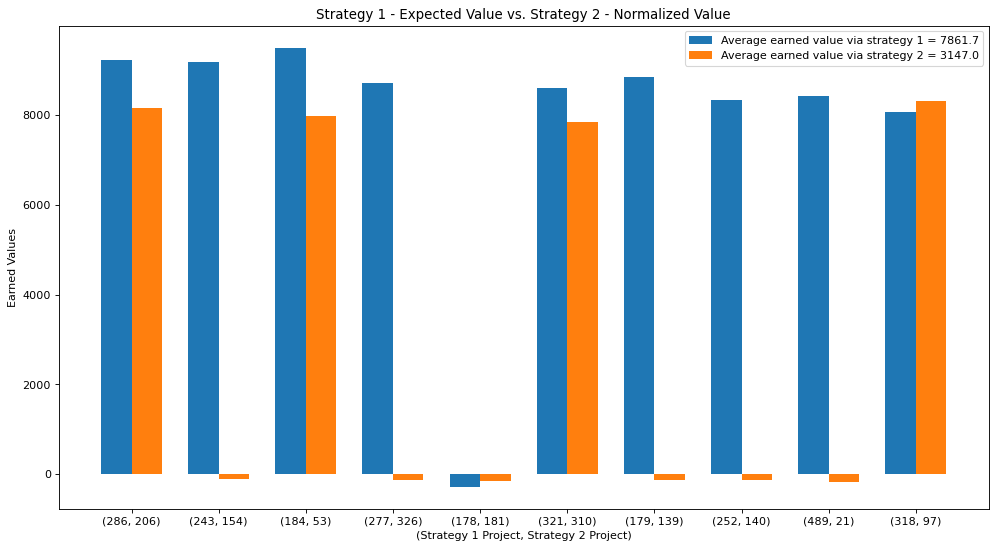

In [10]:
# Visualize the comparison of the two strategies
#labels = [str(p) for p in range(1, n_selected+1)]
labels = list(zip(selected_projects_1, selected_projects_2))
x = np.arange(len(labels))  # the label locations

y1 = [earn_vals[n] for n in selected_projects_1]
avg_earn_val_1 = round(sum(y1)/len(y1),2)

y2 = [earn_vals[n] for n in selected_projects_2]
avg_earn_val_2 = round(sum(y2)/len(y2),2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label=selected_projects_1)
rects2 = ax.bar(x + width/2, y2, width, label=selected_projects_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('(Strategy 1 Project, Strategy 2 Project)')
ax.set_ylabel('Earned Values')
ax.set_title('Strategy 1 - Expected Value vs. Strategy 2 - Normalized Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Average earned value via strategy 1 = {avg_earn_val_1}', 
           F'Average earned value via strategy 2 = {avg_earn_val_2}']
ax.legend(legends, loc='upper right')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()